### **Description**
Objective:
Explore the dataset to identify differences between the customers of each product. 

### **Goal:**

Come up with a customer profile (characteristics of a customer) of the different products.
Perform univariate and multivariate analyses.
Generate a set of insights and recommendations that will help the company in targeting new customers.
 

### **Data Dictionary**
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

- Product - The model no. of the treadmill
- Age -  Age of the customer in no of years
- Gender - Gender of the customer
- Education - Education of the customer in no. of years
- Marital Status - Marital status of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - Income of the customer
- Miles- Miles that a customer expects to run

### **1) Importing the libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

#open-source Python graphing library for building beautiful, interactive visualizations, and showing exact numbers
!pip install plotly
import plotly.express as px

### **Loading the dataset**

In [2]:
#Mount Google drive
#from google.colab import drive
#drive.mount('/content/drive')

# read the dataset
df1 = pd.read_csv("CardioGoodFitness.csv") # please replace '/content/tips.csv' with the location of the dataset in your drive

#copy dataset to not override the original dataset
df = df1.copy()

### **Overview of the dataset**

The initial steps to get an overview of the dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### **Displaying the first 5 rows of the dataset**

In [3]:
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

- *The dataset contains information about the customers' characteristics with the products they bought*
- *It contains details about the type of product, age, gender, education level, marital status, usage of the product, fitness level, customers' income, and miles recorded from the product.* 

#### **Understanding the shape of the dataset**

In [4]:
df.shape

(180, 9)

- *There are 180 rows and 9 columns in the dataset.*

#### **Checking the data types of the columns for the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- *The `Age`, `Education`, `Usage`, `Fitness`, `Income`, and `Miles` columns are numerical columns while the rest are categorical in nature (`Gender`, `MaritalStatus` , and `Product` are 'object'). There are no missing values here.*

The primary difference between categorical and object type columns is that categorical columns help to improve the processing speed and reduces the storage space when we are working with a large dataset.

#### **Getting the statistical summary for the dataset**

In [6]:
df.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

In [7]:
df['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [8]:
df.describe(include='all').T

count unique        top freq          mean           std  \
Product          180      3      TM195   80           NaN           NaN   
Age            180.0    NaN        NaN  NaN     28.788889      6.943498   
Gender           180      2       Male  104           NaN           NaN   
Education      180.0    NaN        NaN  NaN     15.572222      1.617055   
MaritalStatus    180      2  Partnered  107           NaN           NaN   
Usage          180.0    NaN        NaN  NaN      3.455556      1.084797   
Fitness        180.0    NaN        NaN  NaN      3.311111      0.958869   
Income         180.0    NaN        NaN  NaN  53719.577778  16506.684226   
Miles          180.0    NaN        NaN  NaN    103.194444     51.863605   

                   min       25%      50%      75%       max  
Product            NaN       NaN      NaN      NaN       NaN  
Age               18.0      24.0     26.0     33.0      50.0  
Gender             NaN       NaN      NaN      NaN       NaN  
Education         12.0      14.0     16.0     16.0      21.0  
MaritalStatus      NaN       NaN      NaN      NaN       NaN  
Usage              2.0       3.0      3.0      4.0       7.0  
Fitness            1.0       3.0      3.0      4.0       5.0  
Income         29562.0  44058.75  50596.5  58668.0  104581.0  
Miles             21.0      66.0     94.0   114.75     360.0

- *There are 3 different products that the company is selling: TM195, TM498, and TM798. The top selling product is TM195.*
- *The age ranges from around 18-50 years old while the average age is around 29.The median age is 26.*
- *There are more men buying the product than women.*
- *There are more college people buying the product.* 
- *The average usage of the product is 3.45 times a week.*
- *The mean and median of the fitness are very close to each other (~3).*
- *The average income of buyers is 53,719 dollars.*
- *The miles varied from 21 to 360 miles.*

In [9]:
df.duplicated().sum()

0

- *No duplicates indicated.*

### **Check for missing values**

In [10]:
df.isna()

Product    Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  \
0      False  False   False      False          False  False    False   False   
1      False  False   False      False          False  False    False   False   
2      False  False   False      False          False  False    False   False   
3      False  False   False      False          False  False    False   False   
4      False  False   False      False          False  False    False   False   
..       ...    ...     ...        ...            ...    ...      ...     ...   
175    False  False   False      False          False  False    False   False   
176    False  False   False      False          False  False    False   False   
177    False  False   False      False          False  False    False   False   
178    False  False   False      False          False  False    False   False   
179    False  False   False      False          False  False    False   False   

     Miles  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
175  False  
176  False  
177  False  
178  False  
179  False  

[180 rows x 9 columns]

In [11]:
#check each column for missing values
print(df.isnull().sum())

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


There are no missing values.

### **Exploratory Data Analysis**

### **Now we have got a preliminary idea about the dataset. Let us now see the distribution of each of the columns to get a better understanding. Let us start with the numerical columns and use the histplot and boxplot to plot their distribution.**

### **2) Univariate Analysis**

**Let's check the distribution for numerical columns.**

**Observations on Age**

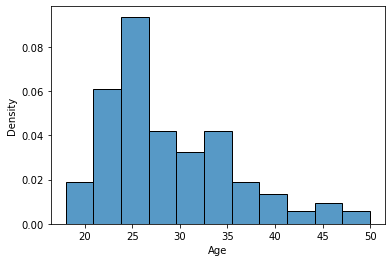

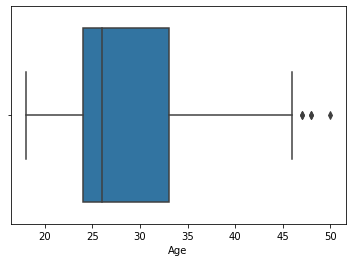

In [12]:
sns.histplot(data=df,x='Age',stat='density')
plt.show()
sns.boxplot(data=df,x='Age')
plt.show()

In [13]:
fig1 = px.box(df, x="Age", points="all")
fig1.show()

* The distribution is skewed towards right.
* There are 5 outliers present in this column, which were above 45 years old. 
* The median is near 26 years old.

**Observations on Education**

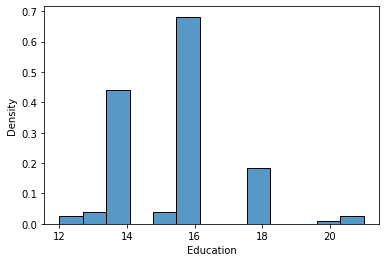

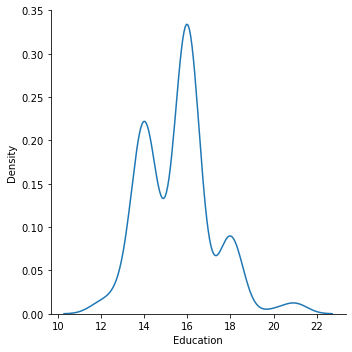

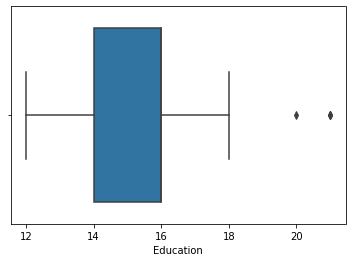

In [14]:
sns.histplot(data=df,x='Education',stat='density')
plt.show()
sns.displot(data=df,x='Education',kind='kde')
plt.show()
sns.boxplot(data=df,x='Education')
plt.show()

In [15]:
fig2 = px.box(df, x="Education", points="all")
fig2.show()

* There is less information about Education, but distribution looks normally distributed. It is difficult to tell.  
* There are 3 outliers, 1 outlier at 20 and 2 outliers at 21.

**Observations on Usage**

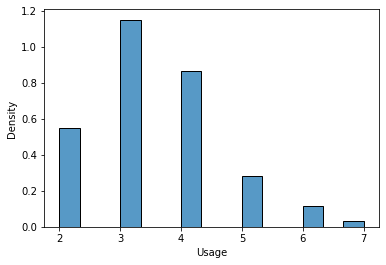

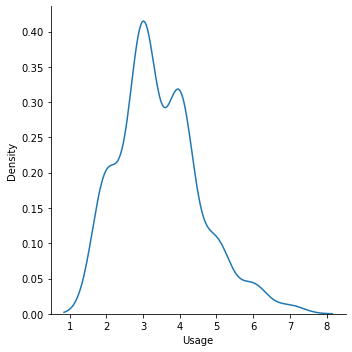

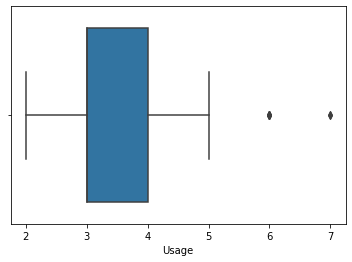

In [16]:
sns.histplot(data=df,x='Usage',stat='density')
plt.show()
sns.displot(data=df,x='Usage',kind='kde')
plt.show()
sns.boxplot(data=df,x='Usage')
plt.show()

In [17]:
fig3 = px.box(df, x="Usage", points="all")
fig3.show()

* There is less information about Usage, but distribution looks normally distributed or right-skewed. It is difficult to tell.  
* There are 5 outliers, 3 outliers at 6 and 2 outliers at 7.

**Observations on Fitness**

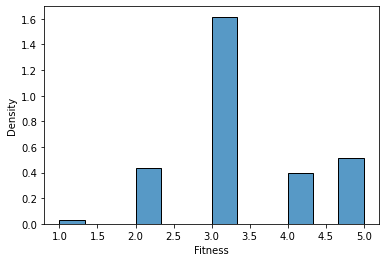

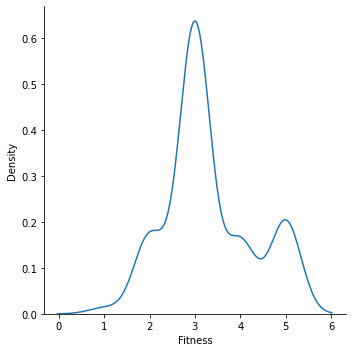

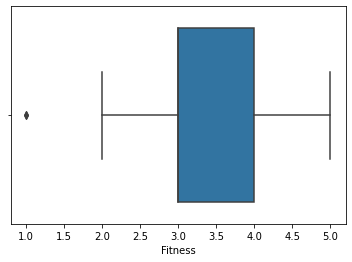

In [18]:
sns.histplot(data=df,x='Fitness',stat='density')
plt.show()
sns.displot(data=df,x='Fitness',kind='kde')
plt.show()
sns.boxplot(data=df,x='Fitness')
plt.show()

In [19]:
fig4 = px.box(df, x="Fitness", points="all")
fig4.show()

* The average and median Fitness level is 3, but distribution looks normally distributed or left-skewed. 
* There are 2 outliers at Fitness level 1.

**Observations on Income**

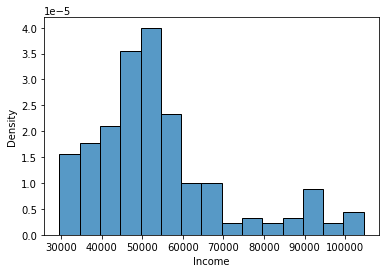

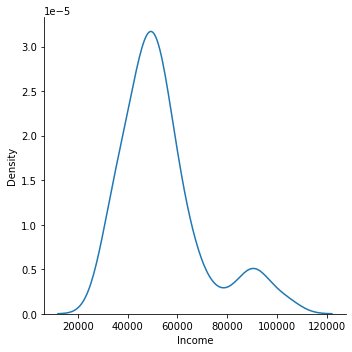

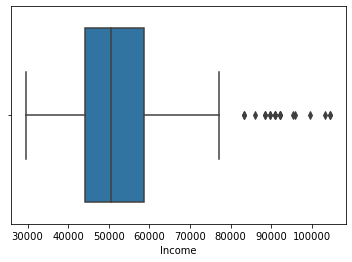

In [20]:
sns.histplot(data=df,x='Income',stat='density')
plt.show()
sns.displot(data=df,x='Income',kind='kde')
plt.show()
sns.boxplot(data=df,x='Income')
plt.show()

In [21]:
fig5 = px.box(df, x="Income", points="all")
fig5.show()

* The distribution looks right-skewed. 
* The median is at 50.6k dollars.
* There are few outliers after 80k.

**Observations on Miles**

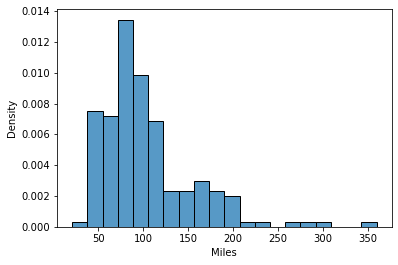

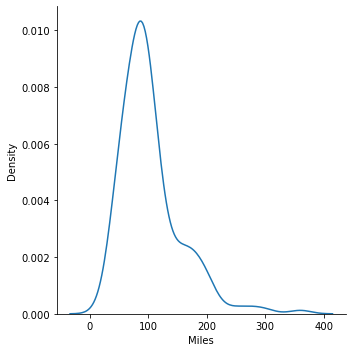

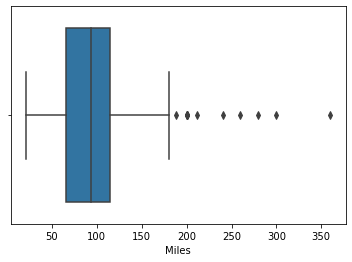

In [22]:
sns.histplot(data=df,x='Miles',stat='density')
plt.show()
sns.displot(data=df,x='Miles',kind='kde')
plt.show()
sns.boxplot(data=df,x='Miles')
plt.show()

In [23]:
fig6 = px.box(df, x="Miles", points="all")
fig6.show()

* The distribution is right-skewed. 
* The median is at 94 miles.
* There are few outliers at 200 miles and above.

**Observations on Product**

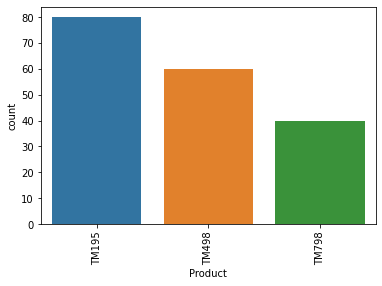

In [24]:
sns.countplot(data=df,x='Product')
plt.xticks(rotation=90)
plt.show()

* TM195 has the highest the highest amount of counts, which is near 80. 
* TM798 had the lowest amount of counts, which is between 30-40.

**Observations on Gender**

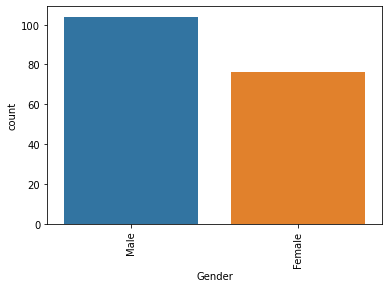

In [25]:
sns.countplot(data=df,x='Gender')
plt.xticks(rotation=90)
plt.show()

* There were more men that bought treadmill products than women.

**Observations on Marital Status**

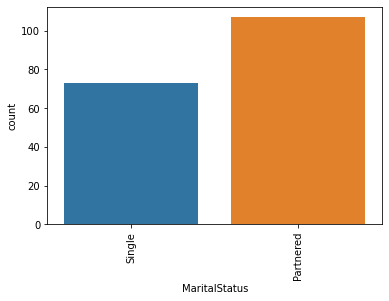

In [26]:
sns.countplot(data=df,x='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

* Partnered people bought treadmill  products than single people.

### **3) Bivariate Analysis**

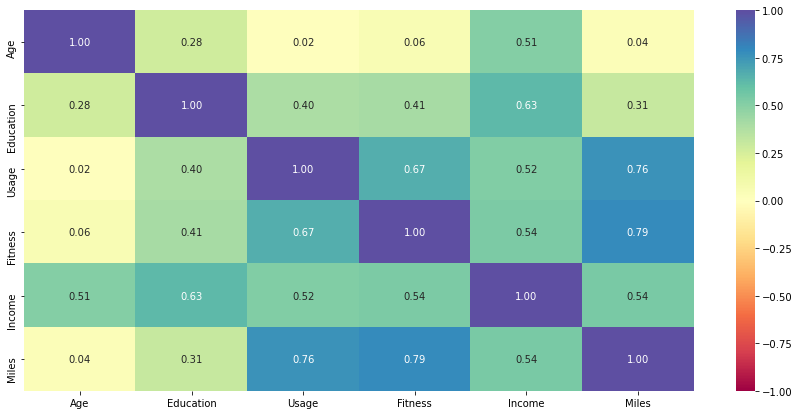

In [27]:
# Check for correlation among numerical variables
num_var = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *As expected, fitness shows high correlation with miles*
- *Usage are low positively correlated with age* 
* *It is important to note that correlation does not imply causation*

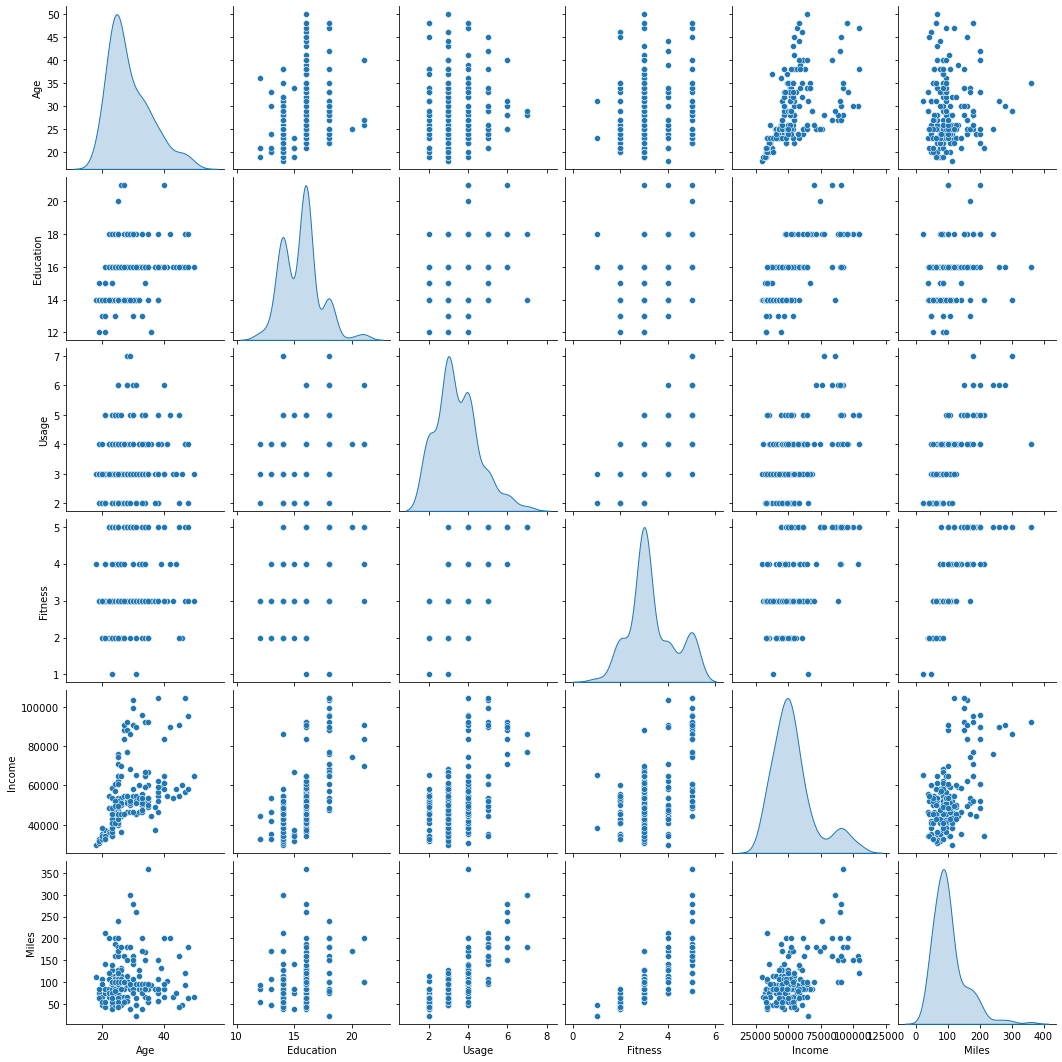

In [28]:
sns.pairplot(data=df, diag_kind="kde")
plt.show();

In [29]:
fig = px.box(df, x="Product", y="Age", points="all")
fig.show()

- For TM195, the median was 26 years old.
- For TM498, the median was 26 years old.
- For TM798, the median was 27 years old.

In [30]:
fig = px.box(df, x="Product", y="Miles", points="all")
fig.show()

- For TM195, the median was 85 miles. 75% of people expected to complete 94 miles or less. 
- For TM498, the median was 85 miles. 75% of people expected to complete 106 miles or less. 
- For TM798, the median was 160 miles. 75% of people expected to complete 188 miles or less. 

### Multivariate Analysis

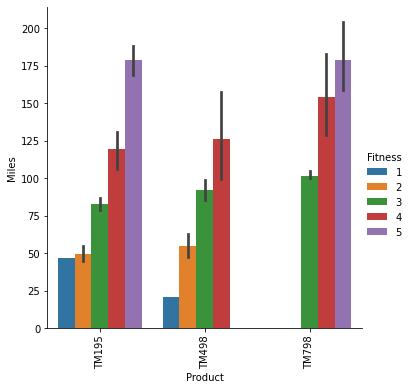

In [31]:
sns.catplot(x='Product', y='Miles', data=df, kind="bar", hue='Fitness')
plt.xticks(rotation=90)
plt.show()

- The product TM195 has the highest amount of miles for fitness level 5, which is around 175 miles.
- The product TM498 has the highest fitness level at 4. 
- The product TM798 has only fitness levels 3, 4, and 5.

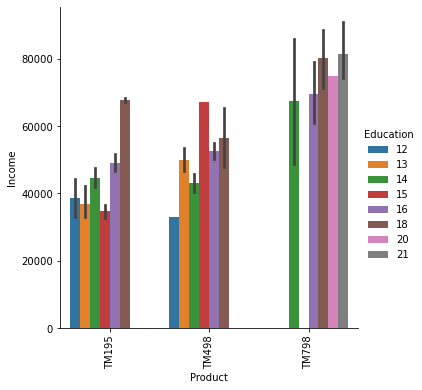

In [32]:
sns.catplot(x='Product', y='Income', data=df, kind="bar", hue='Education')
plt.xticks(rotation=90)
plt.show()

- For the product TM195, this item was purchased from people with 18 years of education and with estimated average income between 60,000 and 70,000 dollars.
- For the product TM498, this item was purchased from people from people with 15 years of education and with estimated average income between 60,000 and 70,000 dollars.
- For the product TM798, this item was purchased from people from people with 21 years of education and with estimated average income between 70,000 and 80,000 dollars.

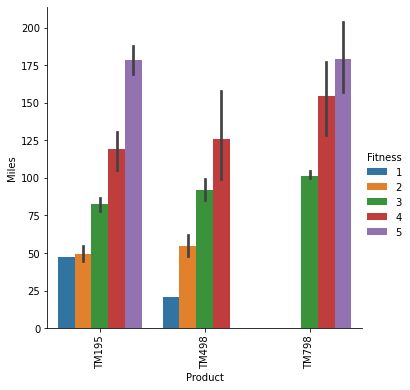

In [33]:
sns.catplot(x='Product', y='Miles', data=df, kind="bar", hue='Fitness')
plt.xticks(rotation=90)
plt.show()

- For TM195, Fitness level 5 was near 175 miles.
- For TM498, Fitness level 4 was near 125 miles. Fitness level 5 is missling
- For TM798, Fitness level 5 was between 150 and 175 miles. Fitness levels 1 and 2 are missing.

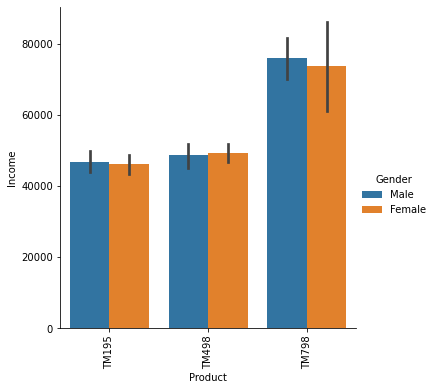

In [34]:
sns.catplot(x='Product', y='Income', data=df, kind="bar", hue='Gender')
plt.xticks(rotation=90)
plt.show()

- For the product TM195, there were more men than women that bought this product, with estimated average income between 40,000 and 50,000 dollars.
- For the product TM498, there were little more women than men that bought this product, with estimated average income between 40,000 and 50,000 dollars.
- For the product TM798, there were more men than women that bought this product, with estimated average income between 60,000 and 70,000 dollars.

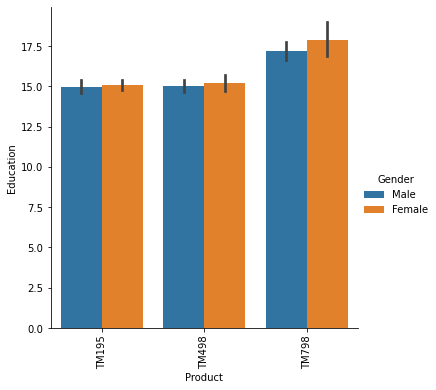

In [35]:
sns.catplot(x='Product', y='Education', data=df, kind="bar", hue='Gender')
plt.xticks(rotation=90)
plt.show()

- For the product TM195, there were little women than men that bought this product; both men and women have nearly 15 years of education.
- For the product TM498, there were little more women than men that bought this product; both men and women have nearly 15 years of education.
- For the product TM798, there were more women than men that bought this product; both men and women have nearly 16-17.5 years of education.
- Comparing to the last graph above this graph, there seems to be a difference for TM195 and TM798. TM195 and TM798 should be investigated further by looking at outliers and other variables.

In [36]:
# Check if the trend is among usage of the product and age
df.groupby(by = ['Product','Usage'])['Age'].mean()

Product  Usage
TM195    2        27.789474
         3        29.189189
         4        28.681818
         5        22.500000
TM498    2        29.428571
         3        28.967742
         4        28.750000
         5        26.333333
TM798    3        22.000000
         4        28.222222
         5        30.833333
         6        29.571429
         7        28.500000
Name: Age, dtype: float64

- For TM195, people near the end of their 20's used this treadmill between 2-4 times a week.
- For TM948, people near the end of their 20's used this treadmill between 2-4 times a week.
- For TM798, people near the end of their 20's used this treadmill between 4-5.5 times a week.

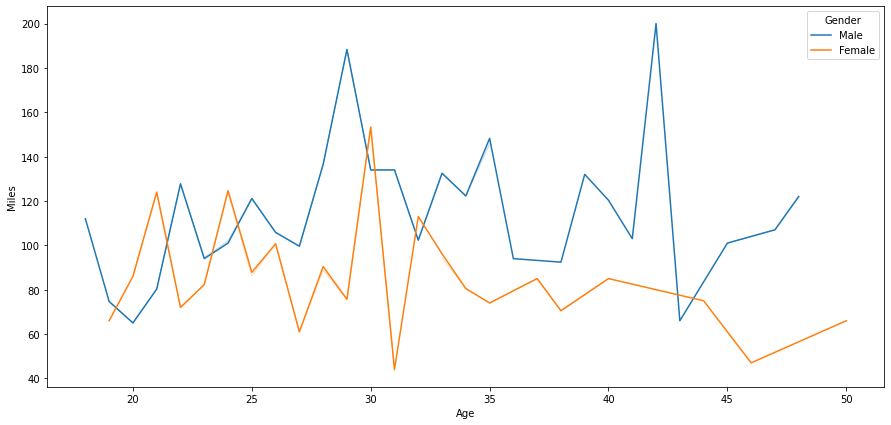

In [37]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="Age", y="Miles", hue='Gender', estimator='mean', ci=False)
plt.ylabel('Miles')
plt.xlabel('Age')
plt.show()

- For ages 20-30, men had average of approximately betwee 140-160 miles. Women had an average of approximately a little above 120 miles.
- For ages 30-40, men had average of approximately betwee 140-160 miles. As age increased, the average miles for women varied from 70-110 miles. 
- For ages 40-45, men had average of approximately betwee 180 miles. Although, this might mean that thare are outliers involved. As age increased, the average miles for women varied from 80-100 miles. 

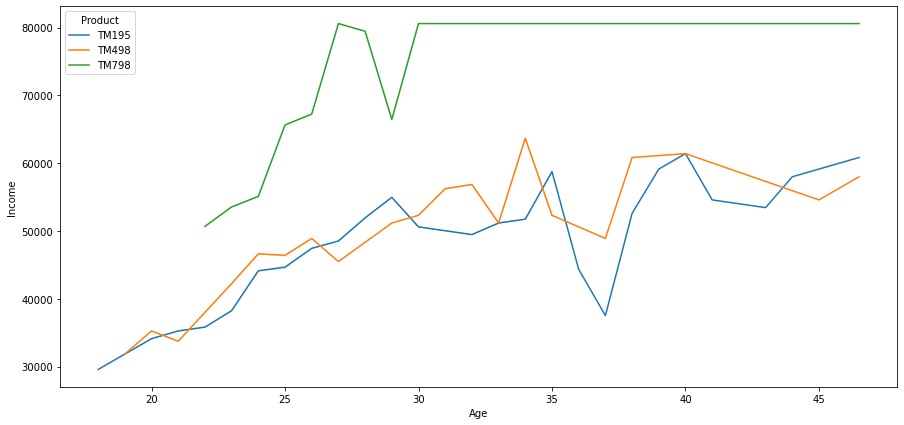

In [75]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="Age", y='Income', hue='Product', estimator='mean', ci=False)
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

- It seems that people with income of at least 50,000 dollars and above can afford TM798.

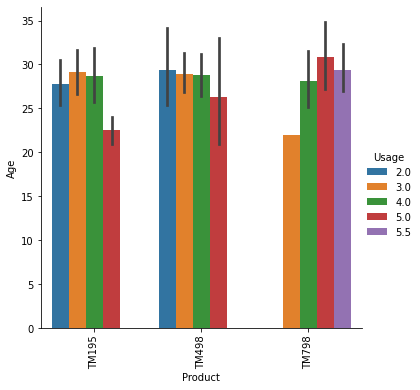

In [80]:
sns.catplot(x='Product', y='Age', data=df, kind="bar", hue='Usage')
plt.xticks(rotation=90)
plt.show()

- For product TM195, people between ages 25 and 30 years old used it 3 times per week.
- For product TM498, people between ages 25 and 30 years old used it 2 times per week.
- For product TM798, people near the age of 30 years old used it 5 times per week.

### 4.4 Missing value treatment

**No missing values indicated here.**

In [38]:
# data.shape[0] will give us the number of rows in the dataset
# selecting the instances where missing value is greater than 0
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

Empty DataFrame
Columns: [Count, Percentage]
Index: []

### 4.5 Outlier Detection and Treatment

In [39]:
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

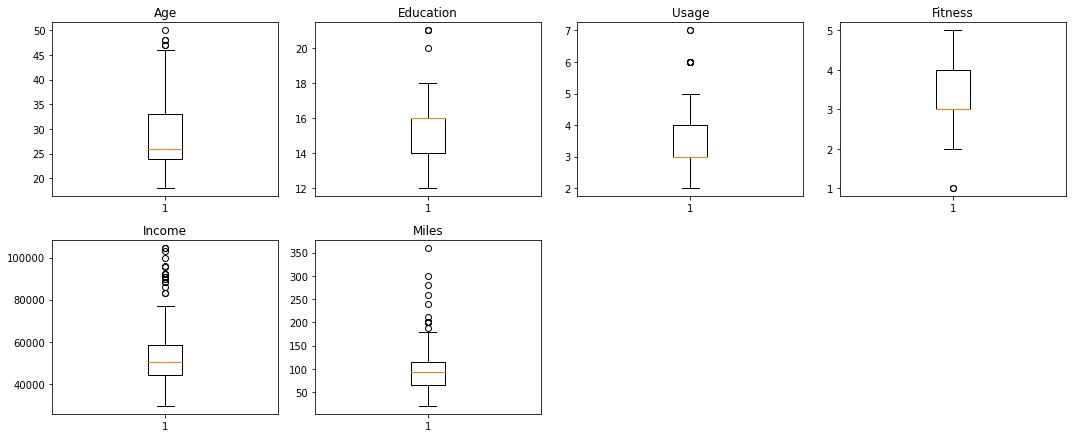

In [40]:
numeric_columns = ['Age', 'Education','Usage', 'Fitness', 'Income', 'Miles']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [41]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [42]:
# Percentage of outliers in each column
((df[numeric_columns] < lower_whisker) | (df[numeric_columns] > upper_whisker)).sum()/df.shape[0]*100

Age           2.777778
Education     2.222222
Usage         5.000000
Fitness       1.111111
Income       10.555556
Miles         7.222222
dtype: float64

**Treating outliers**

I will cap/clip the minimum and maximum value of these columns to the lower and upper whisker value of the boxplot found using  **Q1 - 1.5*IQR** and **Q3 + 1.5*IQR**, respectively. This is because some of the variables contain few variables that may alter the data results.

**Note**: Generally, a value of 1.5 * IQR is taken to cap the values of outliers to upper and lower whiskers but any number (example 0.5, 2, 3, etc) other than 1.5 can be chosen. The value depends upon the business problem statement.

In [43]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

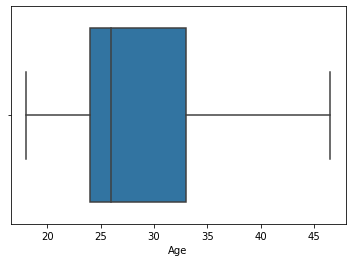

In [44]:
df = treat_outliers(df,'Age')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='Age')
plt.show()

In [45]:
fig = px.box(df, x="Age", points="all")
fig.show()

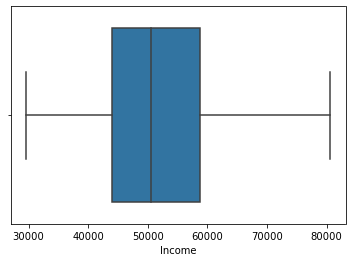

In [46]:
df = treat_outliers(df,'Income')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='Income')
plt.show()

In [47]:
fig = px.box(df, x="Income", points="all")
fig.show()

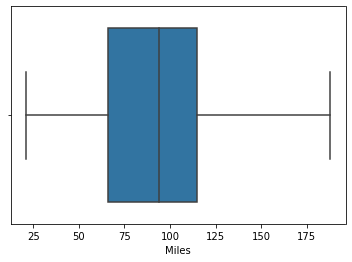

In [48]:
df = treat_outliers(df,'Miles')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='Miles')
plt.show()

In [49]:
fig = px.box(df, x="Miles", points="all")
fig.show()

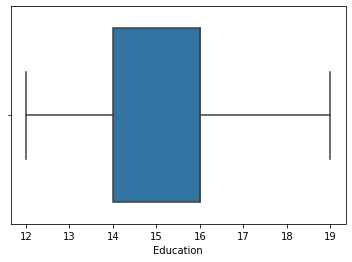

In [50]:
df = treat_outliers(df,'Education')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='Education')
plt.show()

In [51]:
fig = px.box(df, x="Education", points="all")
fig.show()

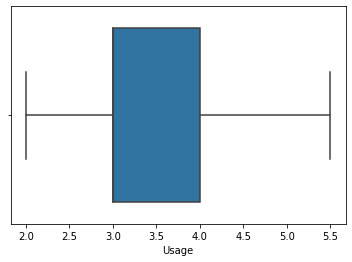

In [52]:
df = treat_outliers(df,'Usage')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='Usage')
plt.show()

In [53]:
fig = px.box(df, x="Usage", points="all")
fig.show()

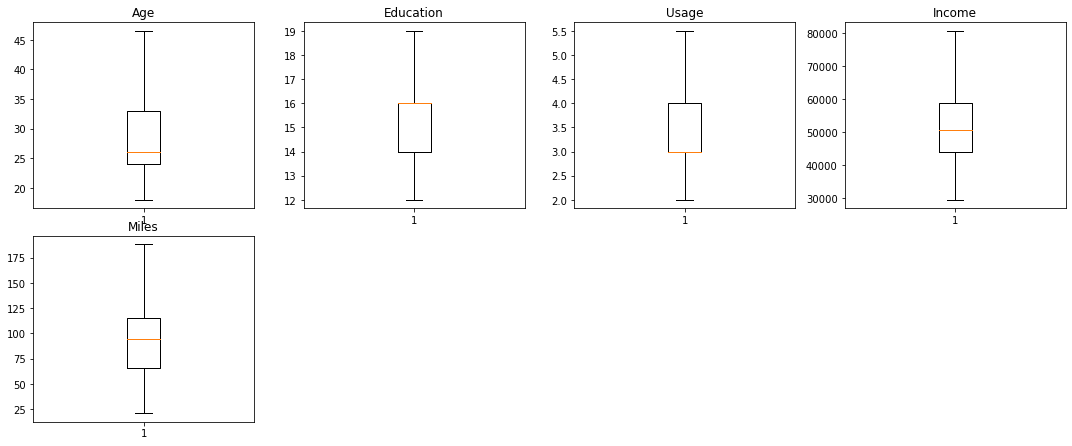

In [54]:
numeric_columns = ['Age', 'Education', 'Usage', 'Income','Miles']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

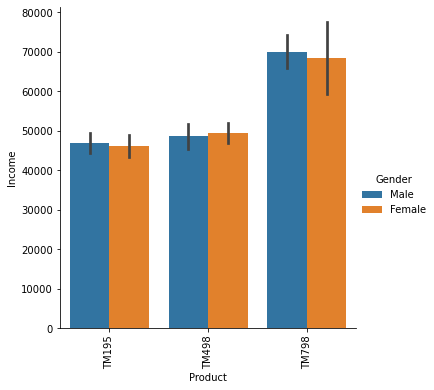

In [55]:
sns.catplot(x='Product', y='Income', data=df, kind="bar", hue='Gender')
plt.xticks(rotation=90)
plt.show()

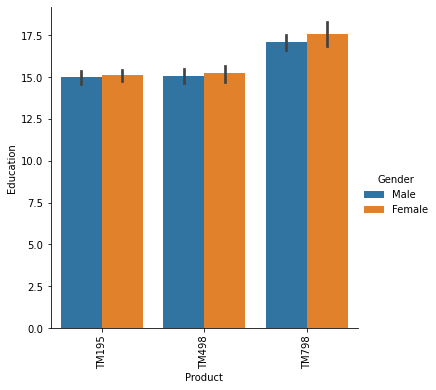

In [56]:
sns.catplot(x='Product', y='Education', data=df, kind="bar", hue='Gender')
plt.xticks(rotation=90)
plt.show()

In [57]:
df.describe(include='all').T

count unique        top freq          mean           std  \
Product          180      3      TM195   80           NaN           NaN   
Age            180.0    NaN        NaN  NaN     28.747222      6.828608   
Gender           180      2       Male  104           NaN           NaN   
Education      180.0    NaN        NaN  NaN     15.533333      1.507523   
MaritalStatus    180      2  Partnered  107           NaN           NaN   
Usage          180.0    NaN        NaN  NaN      3.419444      0.996031   
Fitness        180.0    NaN        NaN  NaN      3.311111      0.958869   
Income         180.0    NaN        NaN  NaN  52440.242361  13488.830441   
Miles          180.0    NaN        NaN  NaN     99.874306     42.163049   

                   min       25%      50%      75%        max  
Product            NaN       NaN      NaN      NaN        NaN  
Age               18.0      24.0     26.0     33.0       46.5  
Gender             NaN       NaN      NaN      NaN        NaN  
Education         12.0      14.0     16.0     16.0       19.0  
MaritalStatus      NaN       NaN      NaN      NaN        NaN  
Usage              2.0       3.0      3.0      4.0        5.5  
Fitness            1.0       3.0      3.0      4.0        5.0  
Income         29562.0  44058.75  50596.5  58668.0  80581.875  
Miles             21.0      66.0     94.0   114.75    187.875

### Insights

We analyzed a dataset of nearly 180 treadmill product informations.
The main feature of interest here is the age of customers, usage of the products, and the customers' characteristics in buying the products. 
From a business perspective, having a certain treadmill is dependent upon the price and product features. Thus we determined the factors that compose of the customers' profile in buying the treadmill product. 

We have been able to conclude that -  

1. Most people who buy the treadmills are around 27 or 28 years old.
2. People with higher education and higher income are most likely to buy the treadmill product TM798. 75% of people with income of 58,668 dollars or less are more likely to buy this treadmill product.
3. People used TM195 around 3 times a week, TM498 around 2 times a week, and TM798 around 5 times a week.
4. Before buying the product, they feel that their fitness level is around 3. This means that they feel they need to be a little bit more fit. 
5. The miles they expect to complete are 99.9 miles.
6. There were more women who bought treadmill products than men, when only looking at the education variable. However, when looking at the income variable, more men bought TM195 and TM798 than women. From the three treadmill products, the most popular treadmill product is TM798 among men and women.
7. Most people's marital status is labeled "partnered" than "single". 


#### **Recommendations to Cardio Fitness Store**

1. TM798 is the most popular treadmill product, followed by TM498 and TM195 respectively.
2. People with higher income buy TM798 treadmill product. It seems that this product is most expensive than the other 2 products. We need to look into TM798 and its features more closely so see why people with more income buy TM798.
3. The number of times people used is TM195 around 3 times a week, TM498 around 2 times a week, and TM798 around 5 times a week. The days of the week and the times of the day used should be considered.
4. The highest number of miles expected was 180 miles when using the products TM195 and TM798. However, TM798 recorded fitness levels 3-5. TM798 might be suited for people who exercise often throughout the week. TM195 might be suited for people who are starting their fitness journey. 
5. Data should be procured for product features to get a better understanding of the demand-supply status and build a machine learning model to accurately predict most used feature from each product, to optimize the product prices. 
6. More data should be procured on product price and a model can be built that can predict optimal pricing.

####  **Further Analysis that can be done**

1. Dig deeper to explore the specific features of each product and the prices of each product.
2. Add more variables, such as the days and times of the week they exercise, and then analyze the data to uncover more insights.